
# <span style="color: #009688;">AI Pose Estimation using OpenCV and Mediapipe</span>

## <span style="color: #00acc1;">1.Make detections</span>
## <span style="color: #4caf50;">2. Estimating Poses</span>
## <span style="color: #ff4081;">3. Extracting Joint Coordinates</span>
## <span style="color: #8e24aa;">4. Calculating Angles Between Joints</span>
## <span style="color: #e91e63;">5. Building a Gym Curl Counter</span>

### <span style="color: #ff5722;">Requirements</span>
- opencv
- mediapipe
- numpy


## Install dependencies

In [1]:
#!pip install mediapipe
#!pip install opencv-python
#!pip install numpy

# Imorting the packages

In [2]:
import  numpy as np
import cv2
import mediapipe as mp



# Setting up mp drawing and pose

In [3]:
# Importing drawing utilities module from Mediapipe library
mp_drawing = mp.solutions.drawing_utils
# The 'mp_drawing' module provides drawing functions to overlay landmarks and connections on images.
# This is useful for visualizing the output of the Pose estimation

# Importing Pose module from Mediapipe library
mp_pose = mp.solutions.pose
# The 'mp_pose' module contains the Pose class, which is used for Pose estimation using Mediapipe.
# It includes predefined models for detecting key landmarks on the human body, allowing us to estimate poses.


# Setting up the video feed

In [7]:
# Opening a video capture object, using the default camera (0)
cap = cv2.VideoCapture(0)

# Infinite loop to continuously capture frames from the video feed
while cap.isOpened():
    # Reading a frame from the video feed
    ret, frame = cap.read()# ret=> True/Flase which tells frame successfull or not
     
     #setting cam to full screen
    cv2.namedWindow('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN)
    cv2.setWindowProperty('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    # Displaying the current frame in a window named 'Mediapipe Feed'
    cv2.imshow('Mediapipe Feed', frame)
    
    # Checking for the 'q' key to be pressed to exit the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Releasing the video capture object
cap.release()

# Closing all OpenCV windows
cv2.destroyAllWindows()



# <span style="color: #00acc1;">1.Make detections</span> and  <span style="color: #4caf50;">2. Estimating Poses</span>
https://developers.google.com/mediapipe/solutions/vision/pose_landmarker

In [9]:
# Open a video capture object using the default camera (camera index 0)
cap = cv2.VideoCapture(0)

# Setup a Mediapipe Pose instance with confidence thresholds for detection and tracking
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        # Read a frame from the video feed
        ret, frame = cap.read() 
        
        # Recolor the image to RGB as Mediapipe requires RGB input
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Perform pose estimation on the RGB image
        results = pose.process(image)
    
        # Recolor the image back to BGR for rendering and display
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render the detected landmarks and connections on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     
        # setting cam to full screen
        cv2.namedWindow('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN)
        cv2.setWindowProperty('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        # Display the annotated image in a window named 'Mediapipe Feed'
        cv2.imshow('Mediapipe Feed', image)

        # Check for the 'q' key press to exit the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [9]:
results.pose_landmarks # identified landmarks 

landmark {
  x: 0.58275706
  y: 0.3811873
  z: -1.0370637
  visibility: 0.99980724
}
landmark {
  x: 0.6012977
  y: 0.33022064
  z: -0.96680325
  visibility: 0.9995727
}
landmark {
  x: 0.6173623
  y: 0.33113497
  z: -0.9670083
  visibility: 0.9995309
}
landmark {
  x: 0.6313187
  y: 0.33239043
  z: -0.96713954
  visibility: 0.9994516
}
landmark {
  x: 0.5545056
  y: 0.32975104
  z: -0.98571855
  visibility: 0.99966395
}
landmark {
  x: 0.53520274
  y: 0.33040008
  z: -0.9854106
  visibility: 0.99972165
}
landmark {
  x: 0.51880246
  y: 0.33114454
  z: -0.9858678
  visibility: 0.99971646
}
landmark {
  x: 0.64762866
  y: 0.3631211
  z: -0.53995335
  visibility: 0.99929595
}
landmark {
  x: 0.48924237
  y: 0.36038527
  z: -0.61101943
  visibility: 0.9998051
}
landmark {
  x: 0.6068862
  y: 0.4412819
  z: -0.88126814
  visibility: 0.9998331
}
landmark {
  x: 0.5487425
  y: 0.4407929
  z: -0.900832
  visibility: 0.99990153
}
landmark {
  x: 0.7613002
  y: 0.6702959
  z: -0.24035391
  visi

In [10]:
mp_pose.POSE_CONNECTIONS # connections that are identified

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

# <span style="color: #ff4081;">3. Extracting Joint Coordinates</span>
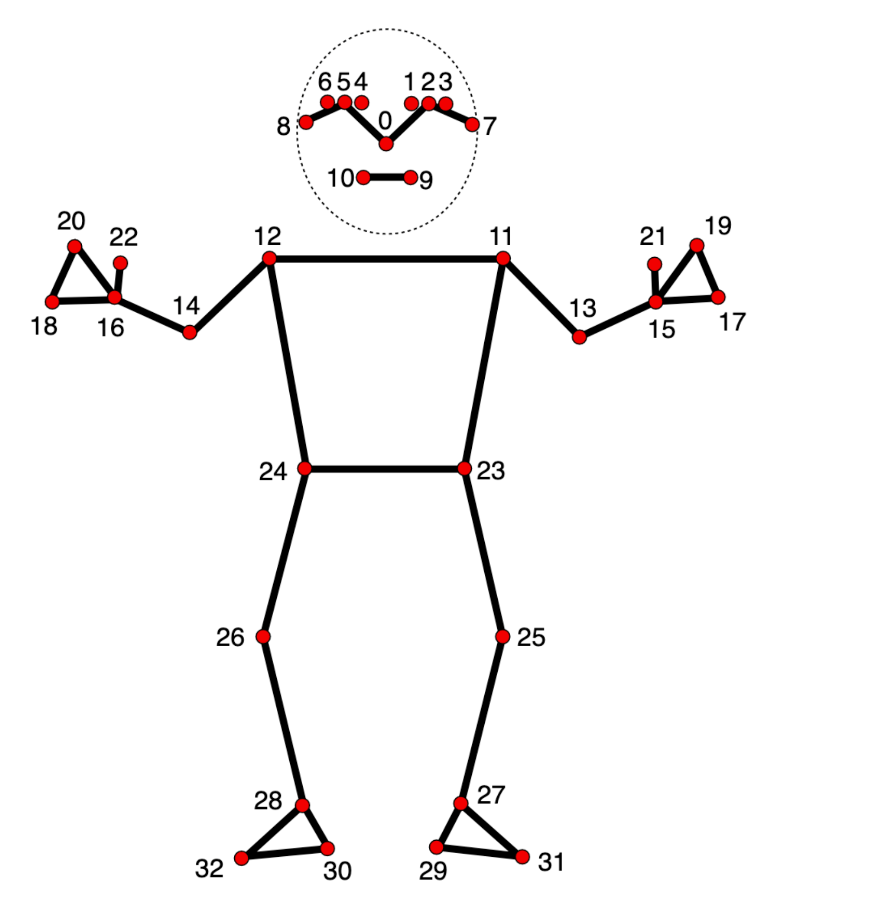

0 - nose
1 - left eye (inner)
2 - left eye
3 - left eye (outer)
4 - right eye (inner)
5 - right eye
6 - right eye (outer)
7 - left ear
8 - right ear
9 - mouth (left)
10 - mouth (right)
11 - left shoulder
12 - right shoulder
13 - left elbow
14 - right elbow
15 - left wrist
16 - right wrist
17 - left pinky
18 - right pinky
19 - left index
20 - right index
21 - left thumb
22 - right thumb
23 - left hip
24 - right hip
25 - left knee
26 - right knee
27 - left ankle
28 - right ankle
29 - left heel
30 - right heel
31 - left foot index
32 - right foot index

In [12]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.namedWindow('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN)
        cv2.setWindowProperty('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.5981713
y: 0.539416
z: -0.7010233
visibility: 0.99995387
, x: 0.61518186
y: 0.5041587
z: -0.6538809
visibility: 0.99988866
, x: 0.6252966
y: 0.5050382
z: -0.6539435
visibility: 0.9998983
, x: 0.63723093
y: 0.50614977
z: -0.6541787
visibility: 0.9998753
, x: 0.5768534
y: 0.5033758
z: -0.6643924
visibility: 0.99989164
, x: 0.56318843
y: 0.50452536
z: -0.6641633
visibility: 0.99991274
, x: 0.5513564
y: 0.5059702
z: -0.66455185
visibility: 0.9999013
, x: 0.6499653
y: 0.52611434
z: -0.3538493
visibility: 0.99985576
, x: 0.5328626
y: 0.5257149
z: -0.39266804
visibility: 0.9999449
, x: 0.6193876
y: 0.58764464
z: -0.58795744
visibility: 0.9999548
, x: 0.57119054
y: 0.58787805
z: -0.59923226
visibility: 0.9999715
, x: 0.7380452
y: 0.79450744
z: -0.13558955
visibility: 0.999451
, x: 0.4253866
y: 0.75277156
z: -0.28934857
visibility: 0.9995987
, x: 0.80975187
y: 1.0198549
z: -0.07119646
visibility: 0.3289827
, x: 0.32643622
y: 0.99251527
z: -0.35640132
visibility: 0.5322749
, x: 0.88316715


[x: 0.596737
y: 0.53895885
z: -0.73426884
visibility: 0.99994516
, x: 0.61301494
y: 0.5019792
z: -0.6816654
visibility: 0.9998679
, x: 0.6237701
y: 0.5029066
z: -0.6818786
visibility: 0.9998815
, x: 0.6349045
y: 0.5045012
z: -0.6820582
visibility: 0.9998461
, x: 0.57416373
y: 0.5027897
z: -0.69383705
visibility: 0.99988174
, x: 0.5606251
y: 0.5041992
z: -0.6935883
visibility: 0.99990743
, x: 0.54787886
y: 0.50600845
z: -0.6939696
visibility: 0.9998935
, x: 0.6482263
y: 0.52573645
z: -0.3674391
visibility: 0.9998333
, x: 0.529269
y: 0.5266178
z: -0.41281843
visibility: 0.9999397
, x: 0.6184901
y: 0.586238
z: -0.61753
visibility: 0.9999448
, x: 0.5696162
y: 0.5880052
z: -0.6300742
visibility: 0.99996716
, x: 0.73492134
y: 0.79490495
z: -0.13393018
visibility: 0.9993263
, x: 0.42612475
y: 0.7593714
z: -0.309019
visibility: 0.9995517
, x: 0.81442785
y: 0.99820334
z: -0.07598447
visibility: 0.35011443
, x: 0.32366616
y: 0.99049145
z: -0.29323968
visibility: 0.5880969
, x: 0.89055395
y: 1.27

[x: 0.58186275
y: 0.5334093
z: -0.71133053
visibility: 0.9999587
, x: 0.60179514
y: 0.49636525
z: -0.6583959
visibility: 0.99990004
, x: 0.61501706
y: 0.49677247
z: -0.65799195
visibility: 0.9999116
, x: 0.62544614
y: 0.497924
z: -0.657247
visibility: 0.99988365
, x: 0.5598828
y: 0.49854884
z: -0.63165087
visibility: 0.9999119
, x: 0.54656017
y: 0.5005216
z: -0.63161534
visibility: 0.99993193
, x: 0.5345264
y: 0.5026704
z: -0.63143075
visibility: 0.9999216
, x: 0.64317805
y: 0.52081156
z: -0.37106398
visibility: 0.999874
, x: 0.52155846
y: 0.5255675
z: -0.28941333
visibility: 0.9999554
, x: 0.61079305
y: 0.57927394
z: -0.6152168
visibility: 0.9999556
, x: 0.55801404
y: 0.5818436
z: -0.58223736
visibility: 0.9999742
, x: 0.74070925
y: 0.7787466
z: -0.22852227
visibility: 0.9993999
, x: 0.42408532
y: 0.75770897
z: -0.12268057
visibility: 0.99962974
, x: 0.94403696
y: 0.98470956
z: -0.6810385
visibility: 0.43933523
, x: 0.23783621
y: 0.93469584
z: -0.47952017
visibility: 0.6588476
, x: 0.

[x: 0.5634593
y: 0.5259276
z: -0.60305536
visibility: 0.99997246
, x: 0.5812629
y: 0.4907681
z: -0.54122925
visibility: 0.99993265
, x: 0.5957891
y: 0.49085435
z: -0.5408682
visibility: 0.99994034
, x: 0.60844815
y: 0.4915215
z: -0.5403296
visibility: 0.9999217
, x: 0.54081047
y: 0.49577537
z: -0.52471113
visibility: 0.9999403
, x: 0.528634
y: 0.49799305
z: -0.5244168
visibility: 0.99995357
, x: 0.51796615
y: 0.49972117
z: -0.52447915
visibility: 0.99994665
, x: 0.62808764
y: 0.5165947
z: -0.24289557
visibility: 0.99991614
, x: 0.5053805
y: 0.52286404
z: -0.15470727
visibility: 0.99996996
, x: 0.59628546
y: 0.5708943
z: -0.50555366
visibility: 0.99996966
, x: 0.53920686
y: 0.5700546
z: -0.48093948
visibility: 0.9999819
, x: 0.7345626
y: 0.7586202
z: -0.12614933
visibility: 0.99956423
, x: 0.419638
y: 0.7531388
z: -0.022605292
visibility: 0.99967295
, x: 0.95477283
y: 0.8762474
z: -0.48519644
visibility: 0.63088685
, x: 0.20742479
y: 0.7877162
z: -0.4028531
visibility: 0.77546495
, x: 0

[x: 0.5603549
y: 0.5177304
z: -0.5472464
visibility: 0.9999815
, x: 0.57683676
y: 0.48212796
z: -0.48300633
visibility: 0.9999543
, x: 0.5906701
y: 0.48199257
z: -0.48259392
visibility: 0.99995947
, x: 0.60364115
y: 0.48281804
z: -0.4820339
visibility: 0.99994695
, x: 0.5380255
y: 0.48810443
z: -0.46861035
visibility: 0.99995923
, x: 0.52586424
y: 0.49061394
z: -0.468436
visibility: 0.9999681
, x: 0.5150999
y: 0.49343356
z: -0.46854702
visibility: 0.9999635
, x: 0.62451065
y: 0.5114311
z: -0.18716635
visibility: 0.9999439
, x: 0.50182545
y: 0.51836556
z: -0.1103773
visibility: 0.99997956
, x: 0.59245396
y: 0.56130594
z: -0.4515946
visibility: 0.99997866
, x: 0.53789204
y: 0.5616815
z: -0.43106613
visibility: 0.9999868
, x: 0.7328331
y: 0.7510609
z: -0.06422573
visibility: 0.99967045
, x: 0.41663402
y: 0.74751294
z: 0.01374733
visibility: 0.99970853
, x: 0.94834137
y: 0.86181504
z: -0.39700094
visibility: 0.7569805
, x: 0.20893553
y: 0.78032345
z: -0.31156322
visibility: 0.8519617
, x: 

[x: 0.5616147
y: 0.51273084
z: -0.5609704
visibility: 0.9999872
, x: 0.57772726
y: 0.4786941
z: -0.49130923
visibility: 0.99996793
, x: 0.59118617
y: 0.4791314
z: -0.49089536
visibility: 0.99997145
, x: 0.603223
y: 0.48043868
z: -0.4903284
visibility: 0.999963
, x: 0.53948915
y: 0.48572502
z: -0.48346257
visibility: 0.9999711
, x: 0.52717596
y: 0.48921826
z: -0.48328733
visibility: 0.9999771
, x: 0.51597416
y: 0.49276346
z: -0.48333526
visibility: 0.999974
, x: 0.62278795
y: 0.50833416
z: -0.17036839
visibility: 0.99996173
, x: 0.5016906
y: 0.5169408
z: -0.12708148
visibility: 0.9999856
, x: 0.5931254
y: 0.5568205
z: -0.45928493
visibility: 0.9999841
, x: 0.53909594
y: 0.55896014
z: -0.44757724
visibility: 0.99998957
, x: 0.731894
y: 0.7498264
z: -0.041409742
visibility: 0.9997383
, x: 0.41676873
y: 0.74729437
z: 0.00057673693
visibility: 0.99969614
, x: 0.94700205
y: 0.86463666
z: -0.3535201
visibility: 0.83992046
, x: 0.21376371
y: 0.78491056
z: -0.31547055
visibility: 0.90222573
, x

[x: 0.56253695
y: 0.51305586
z: -0.6026564
visibility: 0.9999908
, x: 0.5780309
y: 0.4798042
z: -0.53394234
visibility: 0.9999768
, x: 0.5914122
y: 0.48022643
z: -0.5336412
visibility: 0.99997914
, x: 0.6030382
y: 0.4815473
z: -0.533172
visibility: 0.9999736
, x: 0.54039043
y: 0.48668492
z: -0.52619964
visibility: 0.9999787
, x: 0.5278791
y: 0.49008852
z: -0.5261114
visibility: 0.99998266
, x: 0.5163518
y: 0.49363816
z: -0.5262429
visibility: 0.9999807
, x: 0.62248117
y: 0.5083311
z: -0.20764568
visibility: 0.9999731
, x: 0.5018925
y: 0.517478
z: -0.1652705
visibility: 0.9999891
, x: 0.5936336
y: 0.55811137
z: -0.49702054
visibility: 0.99998724
, x: 0.5407156
y: 0.561165
z: -0.48560733
visibility: 0.9999909
, x: 0.73181194
y: 0.74905777
z: -0.06590183
visibility: 0.99977183
, x: 0.41820684
y: 0.749317
z: -0.019260908
visibility: 0.9996426
, x: 0.94576275
y: 0.86573374
z: -0.36513117
visibility: 0.89425695
, x: 0.21540074
y: 0.7921021
z: -0.29644307
visibility: 0.9352056
, x: 0.83660966

[x: 0.56297785
y: 0.5140184
z: -0.6059122
visibility: 0.9999931
, x: 0.578267
y: 0.4808425
z: -0.535252
visibility: 0.9999824
, x: 0.59155566
y: 0.48107776
z: -0.53495675
visibility: 0.99998385
, x: 0.6030454
y: 0.48238802
z: -0.5345062
visibility: 0.9999803
, x: 0.541082
y: 0.4873902
z: -0.5270626
visibility: 0.99998355
, x: 0.52846944
y: 0.4905071
z: -0.52691996
visibility: 0.99998605
, x: 0.51670027
y: 0.49389714
z: -0.52707183
visibility: 0.9999849
, x: 0.6222534
y: 0.508007
z: -0.20347707
visibility: 0.99998033
, x: 0.5020164
y: 0.5171749
z: -0.15637115
visibility: 0.9999913
, x: 0.59385884
y: 0.5594042
z: -0.49726334
visibility: 0.99998915
, x: 0.5418737
y: 0.5629605
z: -0.4853416
visibility: 0.9999916
, x: 0.73168665
y: 0.74792415
z: -0.053088557
visibility: 0.9997912
, x: 0.41853046
y: 0.74928874
z: 0.00529998
visibility: 0.99963105
, x: 0.9469449
y: 0.8656559
z: -0.33793148
visibility: 0.92988443
, x: 0.21546516
y: 0.7933999
z: -0.28059983
visibility: 0.9569373
, x: 0.8371645


[x: 0.5631956
y: 0.51526374
z: -0.6775666
visibility: 0.9999941
, x: 0.578416
y: 0.48230428
z: -0.606996
visibility: 0.9999846
, x: 0.5917317
y: 0.4822884
z: -0.60668224
visibility: 0.9999856
, x: 0.60319936
y: 0.48349333
z: -0.6062059
visibility: 0.9999831
, x: 0.5412757
y: 0.48892313
z: -0.5981071
visibility: 0.9999854
, x: 0.5286593
y: 0.491743
z: -0.59809023
visibility: 0.999987
, x: 0.5167895
y: 0.49486357
z: -0.59820926
visibility: 0.99998635
, x: 0.6223644
y: 0.5079786
z: -0.26916233
visibility: 0.99998397
, x: 0.5020585
y: 0.5174502
z: -0.2189877
visibility: 0.999992
, x: 0.5943159
y: 0.56090796
z: -0.5658151
visibility: 0.9999894
, x: 0.54212743
y: 0.56505334
z: -0.552771
visibility: 0.9999912
, x: 0.7326077
y: 0.7487096
z: -0.11190077
visibility: 0.99979025
, x: 0.41875824
y: 0.7492128
z: -0.048323337
visibility: 0.9995906
, x: 0.94765806
y: 0.8661767
z: -0.41661015
visibility: 0.9532577
, x: 0.21567225
y: 0.8037449
z: -0.34915498
visibility: 0.9711225
, x: 0.8374902
y: 0.530

[x: 0.5639978
y: 0.5170919
z: -0.6140351
visibility: 0.9999947
, x: 0.5796573
y: 0.48382244
z: -0.54803944
visibility: 0.999985
, x: 0.59269863
y: 0.48344553
z: -0.547833
visibility: 0.9999858
, x: 0.6041208
y: 0.48434263
z: -0.54733634
visibility: 0.99998367
, x: 0.54219717
y: 0.49091762
z: -0.5375521
visibility: 0.9999857
, x: 0.52923363
y: 0.49345878
z: -0.537567
visibility: 0.9999871
, x: 0.5171441
y: 0.49649164
z: -0.53772414
visibility: 0.99998677
, x: 0.6226332
y: 0.5080109
z: -0.23227985
visibility: 0.9999852
, x: 0.502328
y: 0.51777434
z: -0.17523338
visibility: 0.9999923
, x: 0.595424
y: 0.56357276
z: -0.5076662
visibility: 0.99998885
, x: 0.5434377
y: 0.5684949
z: -0.49595666
visibility: 0.9999907
, x: 0.7329322
y: 0.76061076
z: -0.073826
visibility: 0.9997721
, x: 0.41830674
y: 0.74284196
z: 0.0025611448
visibility: 0.99960434
, x: 0.93745166
y: 0.9515359
z: -0.44631943
visibility: 0.9679639
, x: 0.2165261
y: 0.85284334
z: -0.298176
visibility: 0.980305
, x: 0.83933604
y: 0

[x: 0.5694083
y: 0.5260073
z: -0.56610274
visibility: 0.99999404
, x: 0.58709234
y: 0.48781854
z: -0.49937224
visibility: 0.999985
, x: 0.59926546
y: 0.48703927
z: -0.49865335
visibility: 0.9999848
, x: 0.60857475
y: 0.4873737
z: -0.4979996
visibility: 0.99998355
, x: 0.5498235
y: 0.49351972
z: -0.50602055
visibility: 0.99998546
, x: 0.53689027
y: 0.4956453
z: -0.5059686
visibility: 0.99998623
, x: 0.52429724
y: 0.49844652
z: -0.50620425
visibility: 0.9999868
, x: 0.627792
y: 0.510068
z: -0.18382238
visibility: 0.99998355
, x: 0.50866723
y: 0.52054
z: -0.19440003
visibility: 0.99999106
, x: 0.59679985
y: 0.5703407
z: -0.45674175
visibility: 0.9999878
, x: 0.5476189
y: 0.57654756
z: -0.45020422
visibility: 0.9999897
, x: 0.7289067
y: 0.7792863
z: 0.0101375375
visibility: 0.99976206
, x: 0.4224599
y: 0.7403667
z: -0.04583911
visibility: 0.9996266
, x: 0.8744184
y: 1.0248302
z: -0.34338397
visibility: 0.9668676
, x: 0.29099447
y: 0.99637663
z: -0.42318702
visibility: 0.980364
, x: 0.79993

[x: 0.58521855
y: 0.54113483
z: -0.720275
visibility: 0.99997574
, x: 0.6005492
y: 0.49794456
z: -0.6598097
visibility: 0.9999488
, x: 0.610252
y: 0.49762043
z: -0.6601288
visibility: 0.9999457
, x: 0.620683
y: 0.49752614
z: -0.6602038
visibility: 0.99993443
, x: 0.5636972
y: 0.5005277
z: -0.6676301
visibility: 0.9999585
, x: 0.55099404
y: 0.50202256
z: -0.66773176
visibility: 0.99996555
, x: 0.5385941
y: 0.5036955
z: -0.668069
visibility: 0.9999681
, x: 0.6358694
y: 0.51742923
z: -0.30344695
visibility: 0.9999361
, x: 0.5162338
y: 0.52378076
z: -0.33937365
visibility: 0.99997413
, x: 0.6053282
y: 0.59141725
z: -0.5902082
visibility: 0.99996257
, x: 0.56073785
y: 0.5943156
z: -0.6014112
visibility: 0.9999728
, x: 0.726326
y: 0.78442675
z: -0.0731023
visibility: 0.9992032
, x: 0.42402735
y: 0.76992995
z: -0.18727443
visibility: 0.9994856
, x: 0.8310801
y: 0.9974444
z: -0.114099264
visibility: 0.85998565
, x: 0.301018
y: 1.0091904
z: -0.6293591
visibility: 0.96170264
, x: 0.8822296
y: 1.

[x: 0.59470963
y: 0.54324776
z: -0.84653455
visibility: 0.9998497
, x: 0.6063181
y: 0.49913442
z: -0.77664465
visibility: 0.99971235
, x: 0.6160079
y: 0.49904835
z: -0.77709246
visibility: 0.9997005
, x: 0.62673146
y: 0.4994485
z: -0.77721554
visibility: 0.999664
, x: 0.57094866
y: 0.5012749
z: -0.7987509
visibility: 0.9997985
, x: 0.5586874
y: 0.5028672
z: -0.79883265
visibility: 0.9998336
, x: 0.54607266
y: 0.5047519
z: -0.79934096
visibility: 0.99984896
, x: 0.6389268
y: 0.52032304
z: -0.3921289
visibility: 0.99957514
, x: 0.5194353
y: 0.52501893
z: -0.48425785
visibility: 0.9998919
, x: 0.6143909
y: 0.5917738
z: -0.7062344
visibility: 0.9998579
, x: 0.570656
y: 0.59275997
z: -0.73246753
visibility: 0.99992794
, x: 0.7284215
y: 0.78794634
z: -0.1320997
visibility: 0.9982977
, x: 0.41443753
y: 0.77250904
z: -0.3130524
visibility: 0.9990156
, x: 0.833827
y: 0.98572856
z: -0.105190195
visibility: 0.6965092
, x: 0.29498065
y: 0.99348795
z: -0.29461294
visibility: 0.89349204
, x: 0.91000

In [13]:
# we want to see the length of landmarks,that we found
len(landmarks)

33

In [14]:
for landmark in mp_pose.PoseLandmark:
    print(landmark)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [15]:
landmarks[mp_pose.PoseLandmark.LEFT_EAR.value]

x: 0.63826454
y: 0.5204505
z: -0.3967331
visibility: 0.9994976

In [16]:
landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].visibility


0.9994975924491882

In [17]:
landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]

x: 0.6961054
y: 2.2969031
z: 0.25630447
visibility: 0.0006317184

In [18]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.7284931
y: 0.78967404
z: -0.1414685
visibility: 0.9982202

In [19]:

landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.8334917
y: 0.9863243
z: -0.12254546
visibility: 0.67812335

In [20]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.9040483
y: 1.2459337
z: -0.544417
visibility: 0.5230386

# <span style="color: #8e24aa;">4. Calculating Angles Between Joints</span>

In [21]:
# any 3 points
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    # 1=>y
    # 0=>x
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [22]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [23]:
shoulder, elbow, wrist

([0.7284930944442749, 0.7896740436553955],
 [0.8334916830062866, 0.9863243103027344],
 [0.9040483236312866, 1.2459336519241333])

In [24]:
calculate_angle(shoulder, elbow, wrist)

167.10524398454405

In [25]:
tuple(np.multiply(elbow, [640, 480]).astype(int))

(533, 473)

In [26]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2, cv2.LINE_AA
                                )
                       
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.namedWindow('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN)
        cv2.setWindowProperty('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [27]:
angle

153.87644211013819

## <span style="color: #e91e63;">5. Building a Gym Curl Counter</span>

In [29]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.namedWindow('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN)
        cv2.setWindowProperty('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6


# Checking the performance

In [20]:
import cv2
import numpy as np

# Assuming you have already imported mp_pose and mp_drawing in your existing code

cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

# List to store angles over time
angles = []

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle (replace this line with your existing calculate_angle function)
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Append angle to the list
            angles.append(angle)
            
            # Visualize angle
            cv2.putText(image, f'Angle: {angle}', tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage == 'down':
                stage = "up"
                counter += 1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # ... (rest of the code remains the same)

        # Display the frame
        cv2.namedWindow('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN)
        cv2.setWindowProperty('Mediapipe Feed', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # After the loop
    cap.release()
    cv2.destroyAllWindows()

# Now you have the 'angles' list containing the calculated angles over time
# You can handle the plotting part or any further processing as needed


1
2
3
4
5
6
7
8


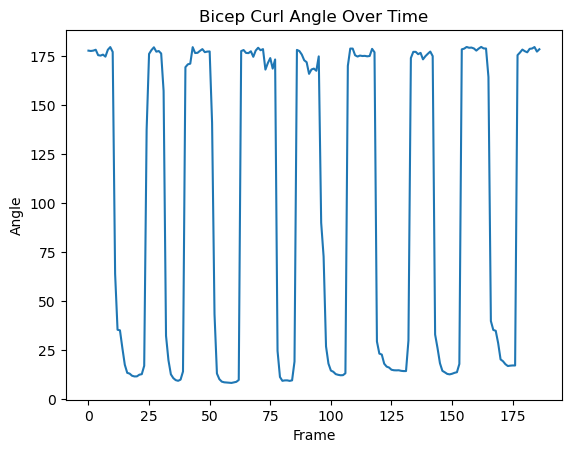

In [21]:
import matplotlib.pyplot as plt

plt.plot(angles)
plt.xlabel('Frame')
plt.ylabel('Angle')
plt.title('Bicep Curl Angle Over Time')
plt.show()


# Accuracy of the model is verfied manual